In [1]:
'''This program attempts to optimize a users portfolio using the Efficient Frontier'''

'This program attempts to optimize a users portfolio using the Efficient Frontier'

In [11]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [77]:
#Get the stock tickers in the portfolio
assets = ['AAPL','AMZN','MSFT','GOOG']

In [78]:
#Assign weights to the stocks.
weights = np.array([0.25,0.25,0.25,0.25])

In [79]:
# Get the stock/ portfolio starting date
stockStartDate = '2016-01-01'

In [80]:
# Get the stocks' ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-02-12'

In [81]:
# Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
yf.pdr_override()

# Store the adjusted close price of the sock into the df
for stock in assets:
  df[stock] = web.get_data_yahoo(stock,start=stockStartDate,end=today)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [82]:
# show df
df

,AAPL,AMZN,MSFT,GOOG
Date,,,,
2016-01-04,23.946918,31.849501,48.698887,37.091999
2016-01-05,23.346823,31.689501,48.921055,37.129002
2016-01-06,22.889940,31.632500,48.032394,37.181000
2016-01-07,21.923868,30.396999,46.361691,36.319500
2016-01-08,22.039801,30.352501,46.503883,35.723499
...,...,...,...,...
2024-02-05,187.440811,170.309998,405.649994,144.929993
2024-02-06,189.058762,169.149994,405.489990,145.410004
2024-02-07,189.168625,170.529999,414.049988,146.679993


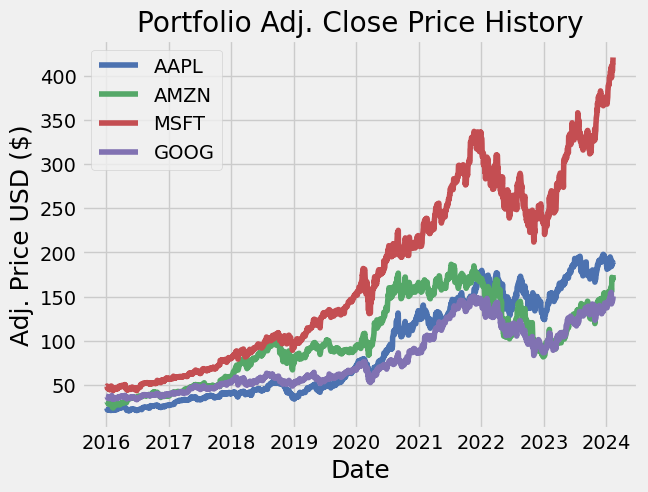

In [83]:
# Visually show the stock/ portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [84]:
# show the daily simple return
returns = df.pct_change()
returns

,AAPL,AMZN,MSFT,GOOG
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.004562,0.000998
2016-01-06,-0.019569,-0.001799,-0.018165,0.001400
2016-01-07,-0.042205,-0.039058,-0.034783,-0.023170
2016-01-08,0.005288,-0.001464,0.003067,-0.016410
...,...,...,...,...
2024-02-05,0.009847,-0.008731,-0.013545,0.009684
2024-02-06,0.008632,-0.006811,-0.000394,0.003312
2024-02-07,0.000581,0.008158,0.021110,0.008734


In [85]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,AAPL,AMZN,MSFT,GOOG
AAPL,0.085403,0.057390,0.057813,0.054148
AMZN,0.057390,0.109800,0.061882,0.062687
MSFT,0.057813,0.061882,0.076581,0.059284
GOOG,0.054148,0.062687,0.059284,0.081021


In [86]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.06620076233405225

In [87]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2572950880488243

In [88]:
# Calculate the annual portfolio return
portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

0.2703617460833624

In [89]:
# Sow the expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance,2)*100)+'%'
percent_vola = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolio_simple_annual_return,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/ risk: '+percent_vola)
print('Annual variance: '+percent_var)

Expected annual return: 27.0%
Annual volatility/ risk: 26.0%
Annual variance: 7.000000000000001%


In [90]:
# Execute to install the package
#!pip install PyPortfolioOpt

In [91]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [92]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.49942), ('AMZN', -0.02092), ('MSFT', 1.0), ('GOOG', -0.47851)])
Expected annual return: 35.5%
Annual volatility: 29.8%
Sharpe Ratio: 1.12


(0.3553407003782782, 0.29846180628322727, 1.1235631940793604)

In [93]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value = 50000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 88, 'MSFT': 79, 'AMZN': -6, 'GOOG': -159}
Funds remaining: $197.57


OrderedDict([('AAPL', 0.998), ('AMZN', 0.002), ('MSFT', 1.00001), ('GOOG', -1.00001)])
Expected annual return: 40.7%
Annual volatility: 36.3%
Sharpe Ratio: 1.07


(0.40725671164662636, 0.3628200532747569, 1.0673520059084607)

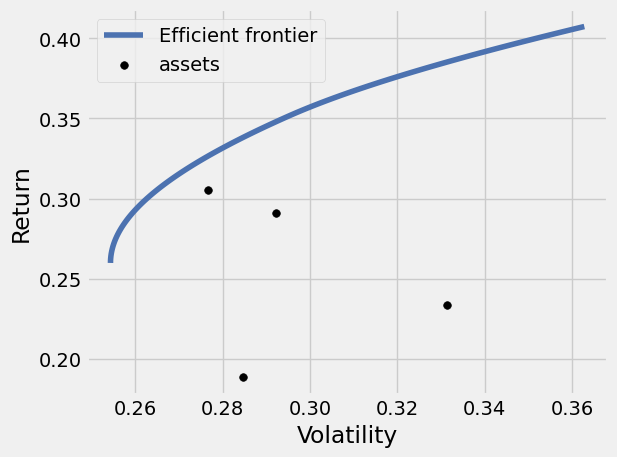

In [94]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
plotting.plot_efficient_frontier(ef)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)




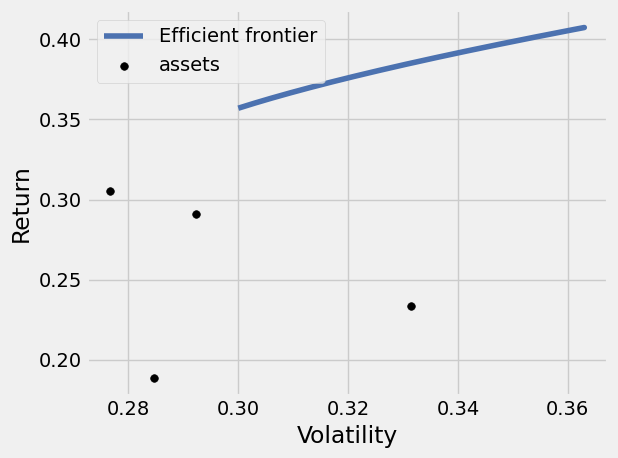

OrderedDict([('AAPL', 1.0), ('AMZN', 0.0), ('MSFT', 1.0), ('GOOG', -1.0)])
Expected annual return: 40.7%
Annual volatility: 36.3%
Sharpe Ratio: 1.07


(0.4073695410013911, 0.36299759729539743, 1.0671407851941248)

In [95]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
# 100 portfolios with risks between 0.10 and 0.30
risk_range = np.linspace(0.30, 0.80, 1000)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,show_assets=True, showfig=True)
#weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


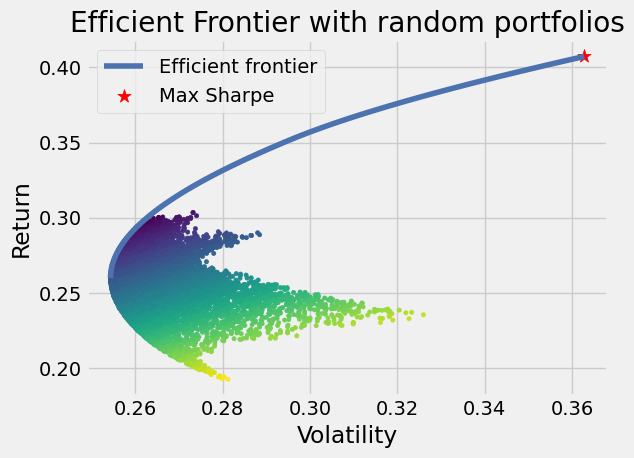

In [96]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
#ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()